In [9]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
warnings.simplefilter(action="ignore", category=FutureWarning)

# EDA Perfoming

### Data Cleaning

In [18]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    # Subset data: Remove outliers for "a"
    q1 = df["a"].quantile(0.25)
    q3 = df["a"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df["a"] > lower_bound) & (df["a"] < upper_bound)]

    # Subset data: Remove outliers for "rms"
    q1 = df["rms"].quantile(0.25)
    q3 = df["rms"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df["rms"] > lower_bound) & (df["rms"] < upper_bound)]


    # Subset data: Remove outliers for "i"
    q1 = df["i"].quantile(0.25)
    q3 = df["i"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df["i"] > lower_bound) & (df["i"] < upper_bound)]

     # Subset data: Remove outliers for "dimeter"
    q1 = df["diameter"].quantile(0.25)
    q3 = df["diameter"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df["diameter"] > lower_bound) & (df["diameter"] < upper_bound)]


    # dropping columns having no correlation with diameter
    df.drop(columns = ["om", "w"] , inplace = True)
    
    #dropping low and high cardanality categorical columns
    df.drop(columns = ["full_name",	"classes","orbit_id","producer"], inplace =True)
    
    
    #dropping multicollinearity
    df.drop(columns=["first_year_obs","moid_jup"],inplace=True)
    
    return df

In [19]:
df = wrangle("top_asteroids.csv")
df.shape

(113442, 16)

In [4]:
df.head()

,e,a,i,om,w,ma,n,tp,moid,moid_jup,data_arc,n_obs_used,rms,diameter,albedo,diameter_sigma,first_year_obs,first_month_obs,last_obs_year,last_obs_month
2,0.160543,2.228812,1.747387,121.579382,252.465454,208.942016,0.296206,2.459110e+06,0.871683,2.87314,36040.0,2357,0.44671,8.196,0.379,0.100,1920,9,2019,5
3,0.167945,2.241299,2.428619,161.636895,172.846491,20.350289,0.293734,2.458531e+06,0.854020,2.73703,33289.0,2574,0.43691,6.534,0.217,0.068,1928,10,2019,11
13,0.278983,2.545744,12.715483,357.019751,349.524955,156.468717,0.242651,2.457956e+06,0.829815,2.17320,40783.0,2192,0.42847,7.726,0.345,0.077,1907,9,2019,5
14,0.137261,2.174837,2.458112,213.756930,174.868642,291.496345,0.307301,2.458823e+06,0.880428,2.95148,39864.0,2760,0.43224,7.250,0.368,0.273,1910,10,2019,11
15,0.107869,2.180337,4.273327,281.903596,90.788273,301.127993,0.306139,2.458793e+06,0.950041,3.02447,39787.0,2719,0.41832,9.003,0.315,0.283,1910,12,2019,11


### Features with High and Low Cardinality

In [20]:
df["classes"].value_counts()

MBA    118581
OMB      6122
IMB       567
APO       429
MCA       342
AMO       224
TJN       130
ATE        87
CEN        11
AST         2
TNO         2
Name: classes, dtype: int64

In [22]:
df["full_name"].value_counts().head()

266455 (2007 JH42)              1
131803 (2002 AD59)              1
106082 (2000 SP350)             1
 16259 Housinger (2000 JR13)    1
397146 (2005 WM162)             1
Name: full_name, dtype: int64

In [23]:
df["orbit_id"].value_counts()

JPL 15     8631
JPL 16     8448
JPL 14     8414
JPL 17     7934
JPL 18     7802
           ... 
JPL 223       1
JPL 140       1
JPL 712       1
JPL 236       1
JPL 134       1
Name: orbit_id, Length: 222, dtype: int64

In [24]:
df["producer"].value_counts()

Otto Matic           126490
Davide Farnocchia         4
Giorgini                  2
Ryan S. Park              1
Name: producer, dtype: int64

In [9]:
df.select_dtypes(exclude="number").head()

,full_name,orbit_id,classes,producer
0,228 Agathe,JPL 35,MBA,Otto Matic
1,290 Bruna,JPL 25,MBA,Otto Matic
2,296 Phaetusa,JPL 28,MBA,Otto Matic
3,315 Constantia,JPL 35,MBA,Otto Matic
4,330 Adalberta (A910 CB),JPL 34,MBA,Otto Matic


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126497 entries, 0 to 126496
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   e                126497 non-null  float64
 1   a                126497 non-null  float64
 2   i                126497 non-null  float64
 3   ma               126497 non-null  float64
 4   n                126497 non-null  float64
 5   tp               126497 non-null  float64
 6   moid             126497 non-null  float64
 7   moid_jup         126497 non-null  float64
 8   data_arc         126497 non-null  float64
 9   n_obs_used       126497 non-null  int64  
 10  rms              126497 non-null  float64
 11  diameter         126497 non-null  float64
 12  albedo           126497 non-null  float64
 13  diameter_sigma   126497 non-null  float64
 14  first_year_obs   126497 non-null  int64  
 15  first_month_obs  126497 non-null  int64  
 16  last_obs_year    126497 non-null  int6

In [7]:
df.describe()

,e,a,i,om,w,ma,n,tp,moid,moid_jup,data_arc,n_obs_used,rms,diameter,albedo,diameter_sigma,first_year_obs,first_month_obs,last_obs_year,last_obs_month
count,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,1.264970e+05,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000,126497.000000
mean,0.146644,2.756965,10.203665,169.819406,181.823887,182.532163,0.223042,2.458473e+06,1.372152,2.103674,8327.433417,619.322261,0.556354,4.162426,0.133238,0.459791,1995.518985,6.819292,2018.317351,6.839364
std,0.076841,0.453027,6.689924,102.749965,103.538522,103.416049,0.054299,8.544471e+02,0.381999,0.401889,4652.967177,518.067224,0.091134,1.933024,0.112034,0.404647,11.947776,3.534653,2.010448,3.590190
min,0.000488,0.626226,0.021855,0.000929,0.004466,0.000517,0.001698,2.451624e+06,0.000166,0.005081,1.000000,5.000000,0.054414,0.008000,0.001000,0.001000,1892.000000,1.000000,2000.000000,1.000000
25%,0.091182,2.510297,5.051481,82.100534,91.822257,93.746347,0.182872,2.458154e+06,1.068410,1.837530,6295.000000,217.000000,0.520510,2.701000,0.053000,0.183000,1993.000000,3.000000,2019.000000,4.000000
50%,0.140047,2.729370,9.244113,160.539684,183.660501,185.542573,0.218580,2.458589e+06,1.353690,2.112610,7527.000000,471.000000,0.554530,3.787000,0.080000,0.337000,1998.000000,8.000000,2019.000000,6.000000
75%,0.192297,3.074005,13.538838,256.258893,271.540490,270.957509,0.247809,2.459022e+06,1.672490,2.385130,9425.000000,901.000000,0.589510,5.265000,0.196000,0.617000,2001.000000,10.000000,2019.000000,11.000000
max,0.968381,69.576833,158.535394,359.990858,359.995174,359.999226,1.988877,2.461586e+06,4.035760,4.419670,46399.000000,4611.000000,8.632100,10.240000,1.000000,22.277000,2014.000000,12.000000,2019.000000,12.000000


In [138]:
df.corr()

,e,a,i,ma,n,tp,moid,data_arc,n_obs_used,rms,diameter,albedo,diameter_sigma,first_month_obs,last_obs_year,last_obs_month
e,1.000000,-0.152621,0.093734,-0.007079,0.145126,0.009181,-0.645217,-0.013686,-0.073396,-0.086941,-0.125871,-0.030027,-0.063755,0.029050,-0.068083,-0.038546
a,-0.152621,1.000000,0.242624,0.080987,-0.988474,0.141626,0.847223,-0.221385,-0.321318,0.209375,0.505332,-0.432693,0.231942,0.007217,0.050000,-0.014067
i,0.093734,0.242624,1.000000,0.009375,-0.232147,-0.063812,0.172244,-0.222807,-0.224627,-0.005380,0.148615,-0.055693,0.038652,-0.028954,-0.132369,-0.008514
ma,-0.007079,0.080987,0.009375,1.000000,-0.070111,0.357760,0.062824,-0.018713,-0.044744,0.025502,0.013704,-0.042709,-0.017350,0.005383,-0.007361,0.082184
n,0.145126,-0.988474,-0.232147,-0.070111,1.000000,-0.143300,-0.832809,0.221875,0.318419,-0.210185,-0.493851,0.437851,-0.230362,-0.008671,-0.065980,0.016243
tp,0.009181,0.141626,-0.063812,0.357760,-0.143300,1.000000,0.099002,0.157837,0.066747,0.054743,0.079103,0.025229,-0.049323,0.061897,0.566791,0.099939
moid,-0.645217,0.847223,0.172244,0.062824,-0.832809,0.099002,1.000000,-0.168356,-0.214607,0.204195,0.457017,-0.317046,0.212657,-0.009492,0.070338,0.010149
data_arc,-0.013686,-0.221385,-0.222807,-0.018713,0.221875,0.157837,-0.168356,1.000000,0.674677,-0.334519,0.276361,0.359566,-0.138785,0.080199,0.351753,0.122234
n_obs_used,-0.073396,-0.321318,-0.224627,-0.044744,0.318419,0.066747,-0.214607,0.674677,1.000000,-0.550481,0.357340,0.574477,-0.210314,0.034594,0.280940,0.157452
rms,-0.086941,0.209375,-0.005380,0.025502,-0.210185,0.054743,0.204195,-0.334519,-0.550481,1.000000,-0.203022,-0.322852,0.163712,-0.029567,-0.013934,-0.142647


## Corelation between independend features

In [139]:
df.drop(columns=["diameter"]).corr()

,e,a,i,ma,n,tp,moid,data_arc,n_obs_used,rms,albedo,diameter_sigma,first_month_obs,last_obs_year,last_obs_month
e,1.000000,-0.152621,0.093734,-0.007079,0.145126,0.009181,-0.645217,-0.013686,-0.073396,-0.086941,-0.030027,-0.063755,0.029050,-0.068083,-0.038546
a,-0.152621,1.000000,0.242624,0.080987,-0.988474,0.141626,0.847223,-0.221385,-0.321318,0.209375,-0.432693,0.231942,0.007217,0.050000,-0.014067
i,0.093734,0.242624,1.000000,0.009375,-0.232147,-0.063812,0.172244,-0.222807,-0.224627,-0.005380,-0.055693,0.038652,-0.028954,-0.132369,-0.008514
ma,-0.007079,0.080987,0.009375,1.000000,-0.070111,0.357760,0.062824,-0.018713,-0.044744,0.025502,-0.042709,-0.017350,0.005383,-0.007361,0.082184
n,0.145126,-0.988474,-0.232147,-0.070111,1.000000,-0.143300,-0.832809,0.221875,0.318419,-0.210185,0.437851,-0.230362,-0.008671,-0.065980,0.016243
tp,0.009181,0.141626,-0.063812,0.357760,-0.143300,1.000000,0.099002,0.157837,0.066747,0.054743,0.025229,-0.049323,0.061897,0.566791,0.099939
moid,-0.645217,0.847223,0.172244,0.062824,-0.832809,0.099002,1.000000,-0.168356,-0.214607,0.204195,-0.317046,0.212657,-0.009492,0.070338,0.010149
data_arc,-0.013686,-0.221385,-0.222807,-0.018713,0.221875,0.157837,-0.168356,1.000000,0.674677,-0.334519,0.359566,-0.138785,0.080199,0.351753,0.122234
n_obs_used,-0.073396,-0.321318,-0.224627,-0.044744,0.318419,0.066747,-0.214607,0.674677,1.000000,-0.550481,0.574477,-0.210314,0.034594,0.280940,0.157452
rms,-0.086941,0.209375,-0.005380,0.025502,-0.210185,0.054743,0.204195,-0.334519,-0.550481,1.000000,-0.322852,0.163712,-0.029567,-0.013934,-0.142647


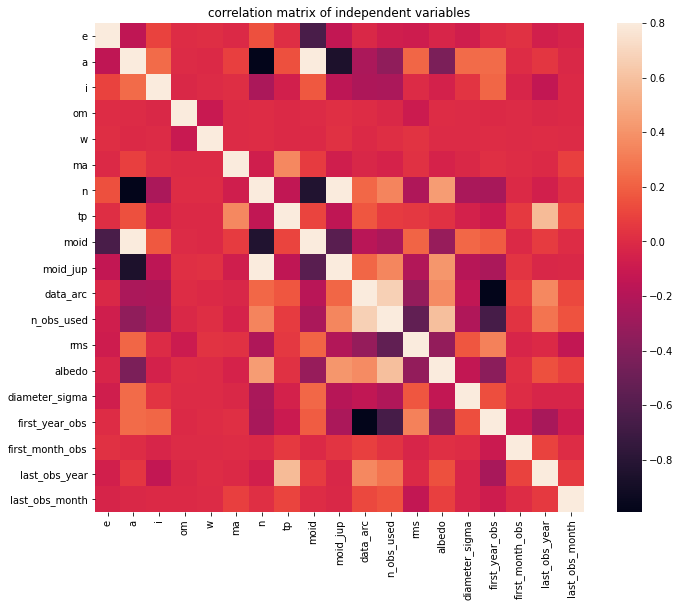

In [6]:
#correlation matrix
corrmat = df.drop(columns=["diameter"]).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("correlation matrix of independent variables")
plt.savefig("correlation_matrix.png")

In [71]:
# print("correlation between diameter and first year observed",df["diameter"].corr(df["first_year_obs"]))
print("correlation between diameter and data_arc",df["diameter"].corr(df["data_arc"]))
# print("correlation between diameter and n",df["diameter"].corr(df["n"]))
print("correlation between diameter and a",df["diameter"].corr(df["a"]))
print("correlation between diameter and albedo",df["diameter"].corr(df["albedo"]))
print("correlation between diameter and moid_jup",df["diameter"].corr(df["moid"]))
print("correlation between diameter and e",df["diameter"].corr(df["e"]))

correlation between diameter and data_arc 0.30657721130460047
correlation between diameter and a 0.4960066880908689
correlation between diameter and albedo -0.26085838909684234
correlation between diameter and moid_jup 0.45273686921269474
correlation between diameter and e -0.1224700301510987


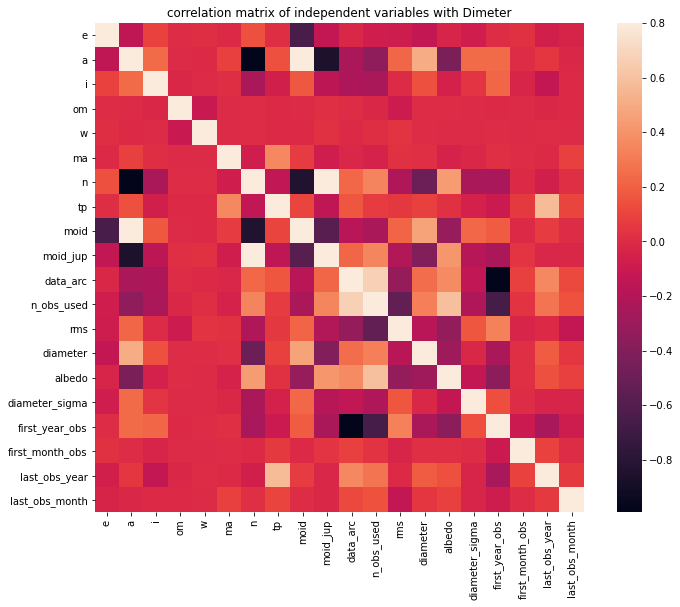

In [7]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("correlation matrix of independent variables with Dimeter")
plt.savefig("correlation_matrix_with_target.png")

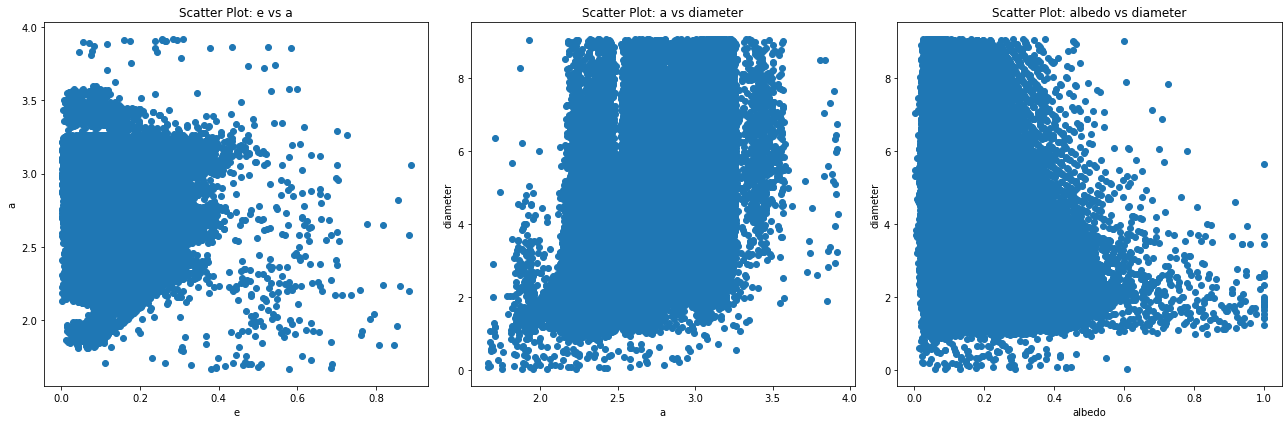

In [15]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: 'e' vs 'a'
axes[0].scatter(df['e'], df['a'])
axes[0].set_xlabel('e')
axes[0].set_ylabel('a')
axes[0].set_title('Scatter Plot: e vs a')

# Plot 2: 'a' vs 'diameter'
axes[1].scatter(df['a'], df['diameter'])
axes[1].set_xlabel('a')
axes[1].set_ylabel('diameter')
axes[1].set_title('Scatter Plot: a vs diameter')

# Plot 3: 'albedo' vs 'diameter'
axes[2].scatter(df['albedo'], df['diameter'])
axes[2].set_xlabel('albedo')
axes[2].set_ylabel('diameter')
axes[2].set_title('Scatter Plot: albedo vs diameter')

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('side_by_side_plots.png')

# Display the plot
plt.show()

## Outlier Analysis

### Diameter Before removing outier

<AxesSubplot:xlabel='diameter', ylabel='Count'>

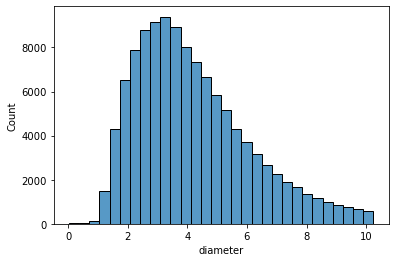

In [150]:
sns.histplot(data=df, x="diameter", bins=30)

## After Removing Outlier it is almost normaly distributed

<AxesSubplot:xlabel='diameter', ylabel='Count'>

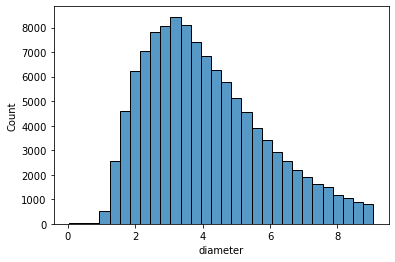

In [155]:
sns.histplot(data=df, x="diameter", bins=30)

<AxesSubplot:>

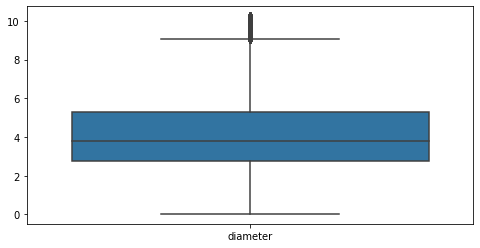

In [149]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[["diameter"]])

<AxesSubplot:>

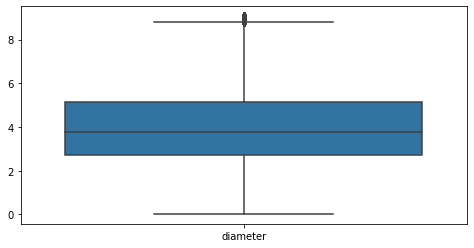

In [156]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[["diameter"]])

<AxesSubplot:>

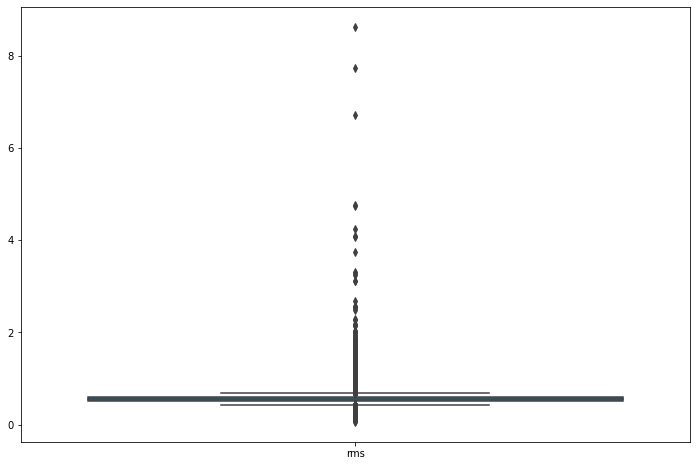

In [75]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[["rms"]])

<AxesSubplot:>

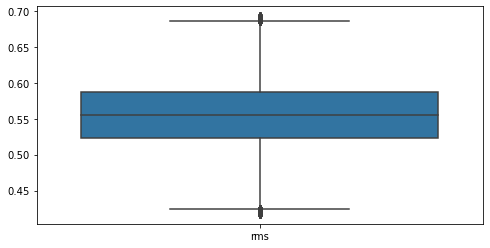

In [79]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[["rms"]])

<AxesSubplot:>

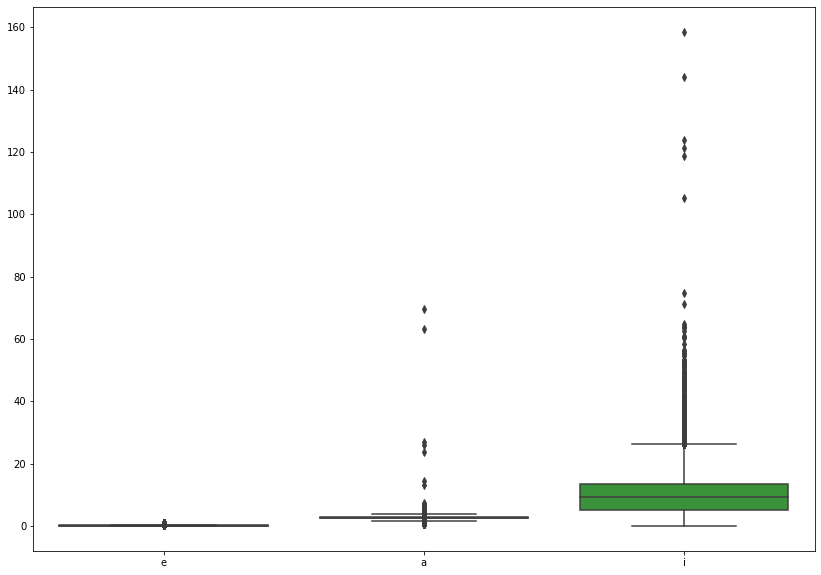

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['e', 'a', 'i']])

<AxesSubplot:>

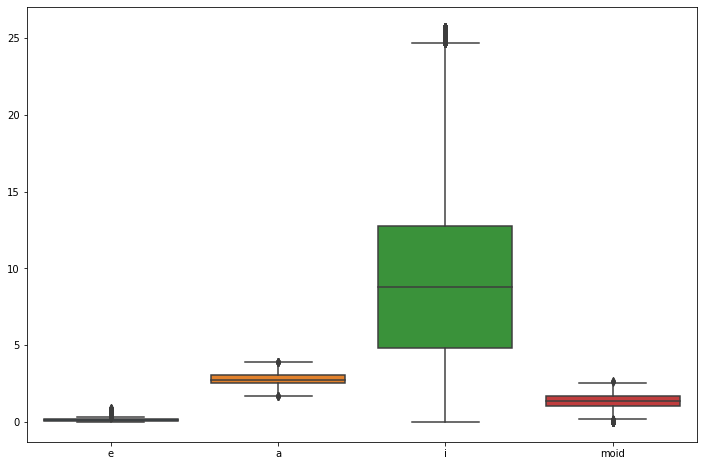

In [94]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['e', 'a', 'i',"moid"]])

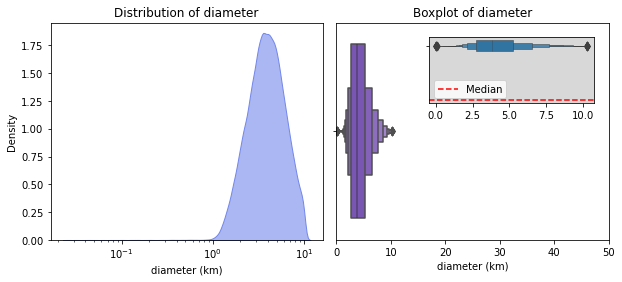

In [98]:
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.05)

plt.subplot(121, xlabel='diameter (km)', title='Distribution of diameter')
sns.kdeplot(data=df, x='diameter', fill=True, log_scale=True, color='#7387EB', alpha=.6)

plt.subplot(122, title='Boxplot of diameter', xlim=(0, 50))
sns.boxenplot(data=df, x='diameter', color='#7647C2')
plt.gca().set(xlabel='diameter (km)')

fig.add_axes([0.65, 0.6, 0.23, 0.23])
zoom_out_ax = sns.boxenplot(data=df, x='diameter', linewidth=.5)
zoom_out_ax.set_facecolor('#D8D8D8')
plt.xlabel('')

# Add median line to the boxplot
median_value = df['diameter'].median()
plt.axhline(y=median_value, color='red', linestyle='--', label='Median')
plt.legend()

plt.show()

Alright, we see that the dataset contains values from 0.0025 to 10.0+, with the most of the values being in a range from 1 to 10. Even though some asteroids seem to be huge and have really large diameters of 10 km or more, the median diameter for the asteroids from this dataset is around 3.8 km.

Note, it's wrong to think that the greater the diameter of the asteroid, the more dangerous it is for Earth. The asteroid is considered potentially hazardous only if it is a Near-Earth object, and generally largest asteroids are less common among NEAs, because they have a greater gravitational attraction to the Sun, which causes them to be more stable in their orbits farther from Earth. Additionally, larger asteroids are more rare overall, as they represent a smaller fraction of the total population of asteroids in our solar system.

In [115]:
df['classes'].value_counts()

MBA    110087
OMB      4930
IMB       372
MCA       244
APO       112
AMO        80
Name: classes, dtype: int64

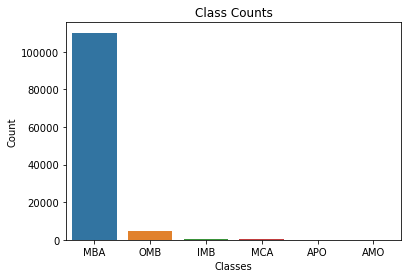

In [114]:
class_counts = df['classes'].value_counts().to_dict()
class_counts = df['classes'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

We see that MBA is certainly leading with around 92% of all asteroids being of that class. Our dataset contains some asteroids from the Outer Main-belt, and much less of other types. Not to mention, that we have only 80 asteroids orbiting outside AMO, all other asteroids usually cross the plane of orbit of certain planets in the solar system.

This actually might make it difficult for our model to generalize when it comes down to predicting diameters in the long run. We would want to make the model predict the diameters for far asteroids correctly, but as of now we won't focus on it, since most of the asteroids we have are MBAs.

Text(0.5, 0, '')

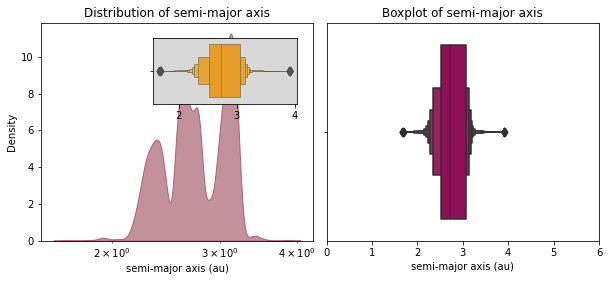

In [116]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.05)

plt.subplot(121, xlabel='semi-major axis (au)', title='Distribution of semi-major axis')
sns.kdeplot(data=df, x='a',fill=True, log_scale=True,  color='#aa6373', alpha=.7)

plt.subplot(122, title='Boxplot of semi-major axis', xlim=(0,6))
sns.boxenplot(data=df, x='a', saturation=.8, color='#9e0059')
plt.gca().set(xlabel='semi-major axis (au)')

fig.add_axes([0.28,0.6,0.20,0.23])
zoom_out_ax = sns.boxenplot(data=df, x='a', saturation=.8, color='#fca311', linewidth=.5)
zoom_out_ax.set_facecolor('#D8D8D8')
plt.xlabel('')

So we see that the most popular value for semi-major axis is around 2.5 and 3, and, overall, it ranges between 1.5 au and 4 au, depending on the class of the asteroid.

[Text(0.5, 0, 'eccentricity')]

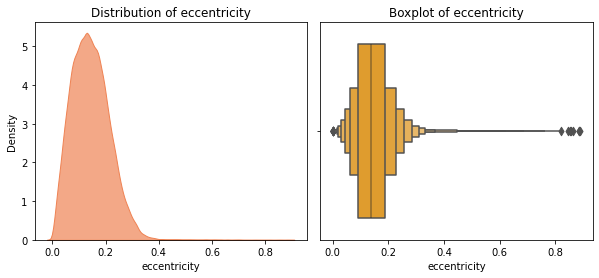

In [118]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.05)

plt.subplot(121, xlabel='eccentricity', title='Distribution of eccentricity')
sns.kdeplot(data=df, x='e',fill=True,  color='#ef8354', alpha=.7, )

plt.subplot(122, title='Boxplot of eccentricity')
sns.boxenplot(data=df, x='e',color='#fca311')
plt.gca().set(xlabel='eccentricity',)

The eccentricity ranges from 0.0 to 0.3, which says that most asteroids have slightly elongated orbit.

[Text(0.5, 0, 'inclination (deg)'), Text(0.5, 1.0, 'Boxplot of inclination')]

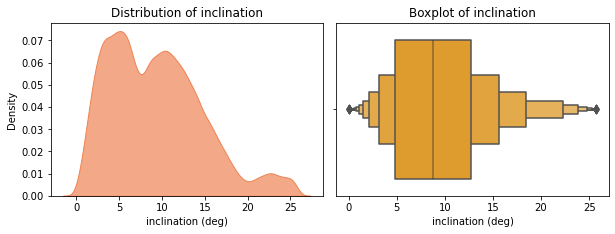

In [128]:
fig = plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.05)

plt.subplot(221, xlabel='inclination (deg)', title='Distribution of inclination')
sns.kdeplot(data=df, x='i',fill=True,  color='#ef8354', alpha=.7, )

plt.subplot(222)
sns.boxenplot(data=df, x='i',color='#fca311')
plt.gca().set(xlabel='inclination (deg)', title='Boxplot of inclination')

So we see that most of the eccentricities are from 0 deg to 15 deg. This may be a hint telling us that most of the asteroids in our dataset are MBAs (low eccentricity due to stable orbit). Not to mention that for these values of inclination we have the range for semi-major axis from 1.5 au to 4 au. Such semi-major axes commonly have MBAs, OMBs, IMBs, APOs, MCAs, APUs.

Therefore, the relationship between an asteroid's inclination and eccentricity can provide important information about the class asteroid belongs to, and thus, its overall characteristics

<AxesSubplot:xlabel='inclination (deg)', ylabel='eccentricity'>

c:\Users\MEER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


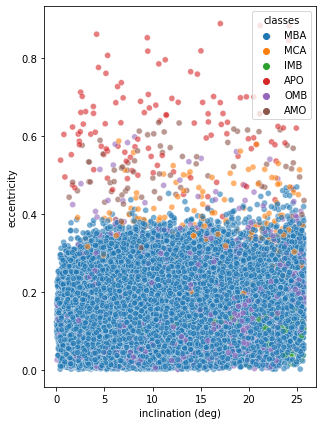

In [133]:
fig = plt.figure(figsize=(10,7))
plt.subplots_adjust(wspace=0.05)

plt.subplot(2,2,(1,3), xlabel='inclination (deg)', ylabel='eccentricity')
sns.scatterplot(data=df, x='i', y='e', hue='classes', 
                alpha=.6)

From the plots this can be concluded:

- MBAs typically have low eccentricities and inclinations, which means their orbits are relatively stable.
- MCAs usually have low-inclination but high-eccentricity orbits, because they may have been perturbed by the gravity of Mars.
- APO have orbits that bring them close to or cross the orbit of Earth. As a result, they tend to have higher eccentricities and inclinations than MBAs.Certain types of NEAs such as ATEs tend to have higher inclinations than other.


In [22]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = df.drop("diameter",axis=1)
y = df["diameter"]

In [24]:
# Horizontal Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [25]:
X_train.head()

,e,a,i,ma,n,tp,moid,data_arc,n_obs_used,rms,albedo,diameter_sigma,first_month_obs,last_obs_year,last_obs_month
52656,0.301162,2.876067,7.046305,264.388383,0.202072,2.459074e+06,1.007630,8770.0,394,0.59894,0.042,0.035,3,2019,3
68924,0.082819,2.696773,4.710427,243.657783,0.222555,2.459123e+06,1.469140,7505.0,399,0.60460,0.046,0.355,10,2019,5
56587,0.252213,2.563935,4.153450,297.359674,0.240073,2.458861e+06,0.906491,7325.0,816,0.60573,0.053,1.259,4,2019,4
56679,0.191185,3.087673,12.786612,224.367310,0.181659,2.459347e+06,1.526220,7181.0,317,0.48692,0.073,0.103,8,2019,4
118795,0.149940,2.036710,5.769140,74.209816,0.339086,2.456058e+06,0.720762,1570.0,18,0.48101,0.072,0.235,2,2014,5


In [26]:


# Create a list of models to evaluate
models = [
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Linear Regression", LinearRegression())
]

# Initiate best_model and its performance metrics
best_model = None
best_rmse = float('inf')

# Iterate over models and evaluate their performance
for name, model in models:
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = pipeline.predict(X_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Print the performance metric
    print("Model:", name)
    print("Test RMSE:", rmse)
    print()

    # Check if the current model has the best RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Test RMSE: 0.5557912596909688

Model: Decision Tree
Test RMSE: 0.8111603731138083

Model: Linear Regression
Test RMSE: 0.8548016521438069

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])


# Hyperparameter tunning for decission tree regressor

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state = 42
)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

model = make_pipeline(
    DecisionTreeRegressor(random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate R-squared for training and validation data
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate RMSE for training and validation data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

print("Training R-squared:", round(r2_train, 2))
print("Validation R-squared:", round(r2_val, 2))
print("Training RMSE:", round(rmse_train, 2))
print("Validation RMSE:", round(rmse_val, 2))

tree_depth = model.named_steps["decisiontreeregressor"].get_depth()
print("Tree Depth:", tree_depth)

Training R-squared: 1.0
Validation R-squared: 0.78
Training RMSE: 0.0
Validation RMSE: 0.82
Tree Depth: 34


In [22]:
depth_hyperparams = range(1,50,2)

In [24]:
# Create empty lists for training R-squared and RMSE scores
training_r2_scores = []
validation_r2_scores = []
training_rmse_scores = []
validation_rmse_scores = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        DecisionTreeRegressor(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Make predictions on training and validation data
    y_train_pred = test_model.predict(X_train)
    y_val_pred = test_model.predict(X_val)
    # Calculate R-squared scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    # Calculate RMSE scores
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
    # Append scores to respective lists
    training_r2_scores.append(r2_train)
    validation_r2_scores.append(r2_val)
    training_rmse_scores.append(rmse_train)
    validation_rmse_scores.append(rmse_val)

print("Training R-squared Scores:", training_r2_scores[:3])
print("Validation R-squared Scores:", validation_r2_scores[:3])
print("Training RMSE Scores:", training_rmse_scores[:3])
print("Validation RMSE Scores:", validation_rmse_scores[:3])

Training R-squared Scores: [0.20600611481076558, 0.4889495215446231, 0.7123824086864605]
Validation R-squared Scores: [0.2002173232274237, 0.48201726136407086, 0.7011513634239879]
Training RMSE Scores: [1.5637730185136285, 1.254576176135037, 0.9411803666404298]
Validation RMSE Scores: [1.5662154831007629, 1.2604428531930125, 0.957395001650114]


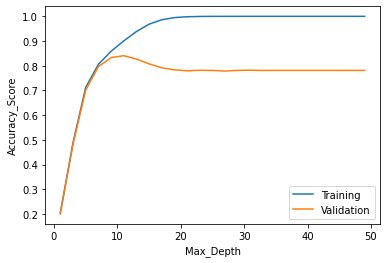

In [25]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_r2_scores, label = "Training")
plt.plot(depth_hyperparams, validation_r2_scores, label = "Validation")
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy_Score")
plt.legend();

# Model accuracy after Tuning

In [26]:
model = make_pipeline(
    DecisionTreeRegressor(max_depth=10,random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared for training and validation data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE for training and validation data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training R-squared:", round(r2_train, 2))
print("Validation R-squared:", round(r2_test, 2))
print("Training RMSE:", round(rmse_train, 2))
print("Validation RMSE:", round(rmse_test, 2))

tree_depth = model.named_steps["decisiontreeregressor"].get_depth()
print("Tree Depth:", tree_depth)

Training R-squared: 0.88
Validation R-squared: 0.84
Training RMSE: 0.61
Validation RMSE: 0.71
Tree Depth: 10


# Hyperparameter tuning for random forest regressor

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state = 42
)

In [28]:
model = make_pipeline(
    RandomForestRegressor(random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate R-squared for training and validation data
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# Calculate RMSE for training and validation data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

print("Training R-squared:", round(r2_train, 2))
print("Validation R-squared:", round(r2_val, 2))
print("Training RMSE:", round(rmse_train, 2))
print("Validation RMSE:", round(rmse_val, 2))

Training R-squared: 0.99
Validation R-squared: 0.9
Training RMSE: 0.21
Validation RMSE: 0.55


AttributeError: 'RandomForestRegressor' object has no attribute 'get_depth'

In [29]:
forest = model.named_steps["randomforestregressor"]
tree_depths = [estimator.get_depth() for estimator in forest.estimators_]
print("Tree Depths:", tree_depths)

Tree Depths: [34, 34, 34, 35, 34, 34, 34, 36, 34, 33, 34, 35, 36, 34, 36, 36, 35, 37, 35, 34, 32, 35, 35, 34, 32, 35, 35, 34, 32, 39, 33, 40, 37, 33, 31, 36, 33, 34, 39, 33, 32, 33, 38, 33, 38, 36, 37, 35, 34, 34, 39, 39, 35, 36, 34, 37, 34, 34, 32, 34, 34, 36, 40, 35, 34, 34, 38, 35, 33, 34, 33, 33, 35, 36, 32, 35, 34, 36, 35, 34, 35, 36, 38, 34, 36, 35, 34, 34, 35, 35, 35, 36, 38, 36, 33, 37, 34, 35, 35, 34]


In [30]:
depth_hyperparams = range(1,70,2)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

# Create empty lists for training R-squared and RMSE scores
training_r2_scores = []
validation_r2_scores = []
training_rmse_scores = []
validation_rmse_scores = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
        RandomForestRegressor(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Make predictions on training and validation data
    y_train_pred = test_model.predict(X_train)
    y_val_pred = test_model.predict(X_val)
    # Calculate R-squared scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    # Calculate RMSE scores
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
    # Append scores to respective lists
    training_r2_scores.append(r2_train)
    validation_r2_scores.append(r2_val)
    training_rmse_scores.append(rmse_train)
    validation_rmse_scores.append(rmse_val)

print("Training R-squared Scores:", training_r2_scores[:3])
print("Validation R-squared Scores:", validation_r2_scores[:3])
print("Training RMSE Scores:", training_rmse_scores[:3])
print("Validation RMSE Scores:", validation_rmse_scores[:3])

Training R-squared Scores: [0.20933468097939467, 0.5281564120002881, 0.752907486313424]
Validation R-squared Scores: [0.20461740780090842, 0.5240100697172042, 0.7446712121419738]
Training RMSE Scores: [1.5604917661449513, 1.2054915359815777, 0.8723583660226655]
Validation RMSE Scores: [1.5619011952993584, 1.2082711306927323, 0.8849432238198869]


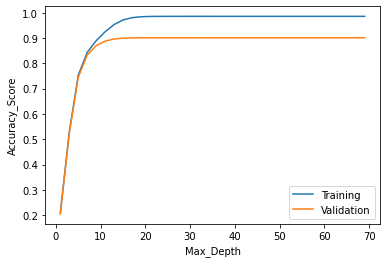

In [32]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_r2_scores, label = "Training")
plt.plot(depth_hyperparams, validation_r2_scores, label = "Validation")
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy_Score")
plt.legend();

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [14]:
X_train.shape

(16000, 15)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

model = make_pipeline(
    RandomForestRegressor(max_depth=12,random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on training and validation data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared for training and validation data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE for training and validation data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Training R-squared:", round(r2_train, 2))
print("Validation R-squared:", round(r2_test, 2))
print("Training RMSE:", round(rmse_train, 2))
print("Validation RMSE:", round(rmse_test, 2))

Training R-squared: 0.93
Validation R-squared: 0.89
Training RMSE: 0.45
Validation RMSE: 0.58


In [46]:
print("Training R-squared:", round(r2_train, 2))
print("Test R-squared:", round(r2_test, 2))
print("Training RMSE:", round(rmse_train, 2))
print("Test RMSE:", round(rmse_test, 2))

Training R-squared: 0.93
Test R-squared: 0.89
Training RMSE: 0.45
Test RMSE: 0.58


In [44]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))


In [15]:
import pickle
model = pickle.load(open('model.pkl', 'rb'))

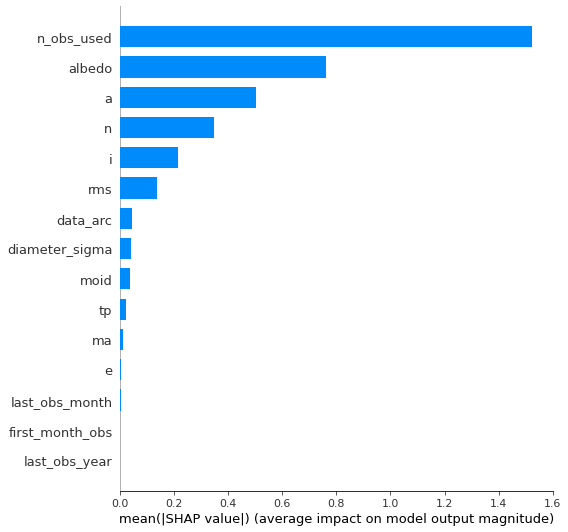

In [16]:
import shap

# Step 2: Identify the top three features
importance_scores = model.named_steps["randomforestregressor"].feature_importances_
top_features_indices = importance_scores.argsort()[-3:][::-1]
top_features = X_train.columns[top_features_indices]

# Step 3: Calculate Shapley values
explainer = shap.Explainer(model.named_steps["randomforestregressor"])
shap_values = explainer.shap_values(X_test)

# Step 4: Generate Shapley plots for the top three features
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

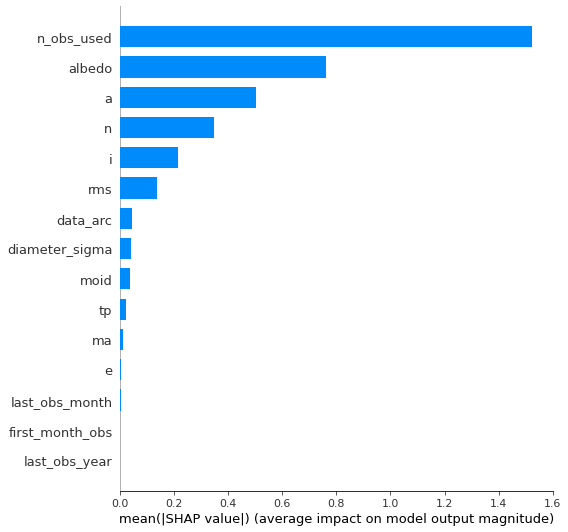

Top feature for decreasing diameter prediction: n_obs_used


In [17]:
import shap

# Calculate Shapley values
explainer = shap.Explainer(model.named_steps["randomforestregressor"])
shap_values = explainer.shap_values(X_test)

# Get feature importances
importance_scores = model.named_steps["randomforestregressor"].feature_importances_

# Sort features based on importance scores
top_features_indices = importance_scores.argsort()[::-1]
top_features = X_train.columns[top_features_indices]

# Generate Shapley plots for increasing diameter prediction (top three features)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

# Find the top feature for decreasing diameter prediction
top_feature_decreasing = top_features[0]
print("Top feature for decreasing diameter prediction:", top_feature_decreasing)